In [1]:
from config import *
from map_wrapper import *

In [2]:
print(f"{year}-{month:02}")

2020-02


In [3]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
from mpl_toolkits.basemap import Basemap

In [4]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [5]:
conn=db.get_conn()

In [6]:

cities = """
('北京','上海','深圳','杭州','广州','南京','苏州','成都','东莞','西安','武汉','天津','长沙',
'宁波','福州','大连','重庆','青岛','济南','合肥','长春','昆明','郑州','沈阳','哈尔滨','厦门')
"""
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and city in {cities}", con=conn)


In [7]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [8]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [9]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['平均工资']=salary_mean
    sub_data['最低工资']=salary_95_min
    sub_data['中位数']=salary_median
    sub_data['最高工资']=salary_95_max
    sub_data['招聘人数']=count
    sub_data['百分比']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='平均工资', ascending=False)

    return sub_data

data_format={"百分比":"{:.2%}","平均工资":"{:.0f}","中位数":"{:.0f}","最低工资":"{:.0f}","最高工资":"{:.0f}"}

translate_dict={}


# 程序员工资

In [10]:
data_city=get_sub_stats_by_col(data,'city')
data_city.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
3,北京,18098,3750,15000,45000,20529,9.53%
1,深圳,16903,5750,15000,37500,30941,14.36%
0,上海,16768,5250,15000,37500,36382,16.88%
10,杭州,15566,3750,14000,35000,10909,5.06%
13,广州,13917,3750,12500,30000,23149,10.74%
8,南京,13414,4500,12500,29045,11461,5.32%
2,成都,12609,3750,11500,30000,10245,4.75%
9,苏州,12095,3750,11500,25000,6465,3.00%
15,东莞,12034,4500,12000,22500,2209,1.03%
6,武汉,11850,3750,11000,26000,12977,6.02%


In [11]:
describe(data_city,'程序员')

2020年2月北京招收程序员20529人。2019年2月北京程序员平均工资18098元，工资中位数15000元，其中95%的人的工资介于3750元到45000元。

2020年2月深圳招收程序员30941人。2019年2月深圳程序员平均工资16903元，工资中位数15000元，其中95%的人的工资介于5750元到37500元。

2020年2月上海招收程序员36382人。2019年2月上海程序员平均工资16768元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2020年2月杭州招收程序员10909人。2019年2月杭州程序员平均工资15566元，工资中位数14000元，其中95%的人的工资介于3750元到35000元。

2020年2月广州招收程序员23149人。2019年2月广州程序员平均工资13917元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2020年2月南京招收程序员11461人。2019年2月南京程序员平均工资13414元，工资中位数12500元，其中95%的人的工资介于4500元到29045元。

2020年2月成都招收程序员10245人。2019年2月成都程序员平均工资12609元，工资中位数11500元，其中95%的人的工资介于3750元到30000元。

2020年2月苏州招收程序员6465人。2019年2月苏州程序员平均工资12095元，工资中位数11500元，其中95%的人的工资介于3750元到25000元。

2020年2月东莞招收程序员2209人。2019年2月东莞程序员平均工资12034元，工资中位数12000元，其中95%的人的工资介于4500元到22500元。

2020年2月武汉招收程序员12977人。2019年2月武汉程序员平均工资11850元，工资中位数11000元，其中95%的人的工资介于3750元到26000元。

2020年2月西安招收程序员6107人。2019年2月西安程序员平均工资11654元，工资中位数10500元，其中95%的人的工资介于3750元到27500元。

2020年2月长沙招收程序员5478人。2019年2月长沙程序员平均工资11541元，工资中位数11000元，其中95%的人的工资介于3790元到25000元。

2020年2月大

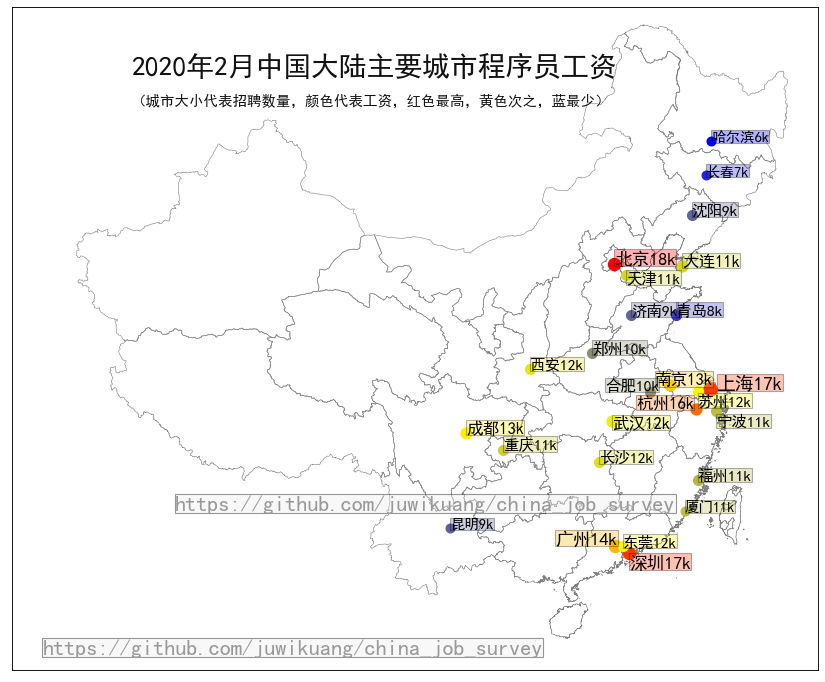

In [12]:
draw_city_map(data_city,2000,f'{year}年{month}月中国大陆主要城市程序员工资')

# 区块链工程师

In [13]:
data_blockchain=get_sub_stats_by_col(data[(data.expert_blockchain==1)],'city')

data_blockchain.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
16,天津,25000,25000,25000,25000,1,0.16%
3,上海,23704,11500,23750,45000,54,8.77%
18,苏州,22500,22500,22500,22500,2,0.32%
10,郑州,22500,22500,22500,22500,5,0.81%
4,北京,22118,4570,17500,60000,65,10.55%
13,厦门,20000,17500,20000,32500,6,0.97%
5,深圳,19696,5088,20000,35688,129,20.94%
7,南京,17955,12500,17500,37500,11,1.79%
0,广州,17724,4495,15000,30000,214,34.74%
2,杭州,17526,2500,19250,29694,42,6.82%


In [14]:
describe(data_blockchain,'区块链工程师')

2020年2月天津招收区块链工程师1人。2019年2月天津区块链工程师平均工资25000元，工资中位数25000元，其中95%的人的工资介于25000元到25000元。

2020年2月上海招收区块链工程师54人。2019年2月上海区块链工程师平均工资23704元，工资中位数23750元，其中95%的人的工资介于11500元到45000元。

2020年2月苏州招收区块链工程师2人。2019年2月苏州区块链工程师平均工资22500元，工资中位数22500元，其中95%的人的工资介于22500元到22500元。

2020年2月郑州招收区块链工程师5人。2019年2月郑州区块链工程师平均工资22500元，工资中位数22500元，其中95%的人的工资介于22500元到22500元。

2020年2月北京招收区块链工程师65人。2019年2月北京区块链工程师平均工资22118元，工资中位数17500元，其中95%的人的工资介于4570元到60000元。

2020年2月厦门招收区块链工程师6人。2019年2月厦门区块链工程师平均工资20000元，工资中位数20000元，其中95%的人的工资介于17500元到32500元。

2020年2月深圳招收区块链工程师129人。2019年2月深圳区块链工程师平均工资19696元，工资中位数20000元，其中95%的人的工资介于5088元到35688元。

2020年2月南京招收区块链工程师11人。2019年2月南京区块链工程师平均工资17955元，工资中位数17500元，其中95%的人的工资介于12500元到37500元。

2020年2月广州招收区块链工程师214人。2019年2月广州区块链工程师平均工资17724元，工资中位数15000元，其中95%的人的工资介于4495元到30000元。

2020年2月杭州招收区块链工程师42人。2019年2月杭州区块链工程师平均工资17526元，工资中位数19250元，其中95%的人的工资介于2500元到29694元。

2020年2月大连招收区块链工程师5人。2019年2月大连区块链工程师平均工资16800元，工资中位数15500元，其中95%的人的工资介于9500元到30000元。

2020年2月宁波招收区块链工程师2人。2019年2月宁波区块链工程师平均工资16166元，工资中位数

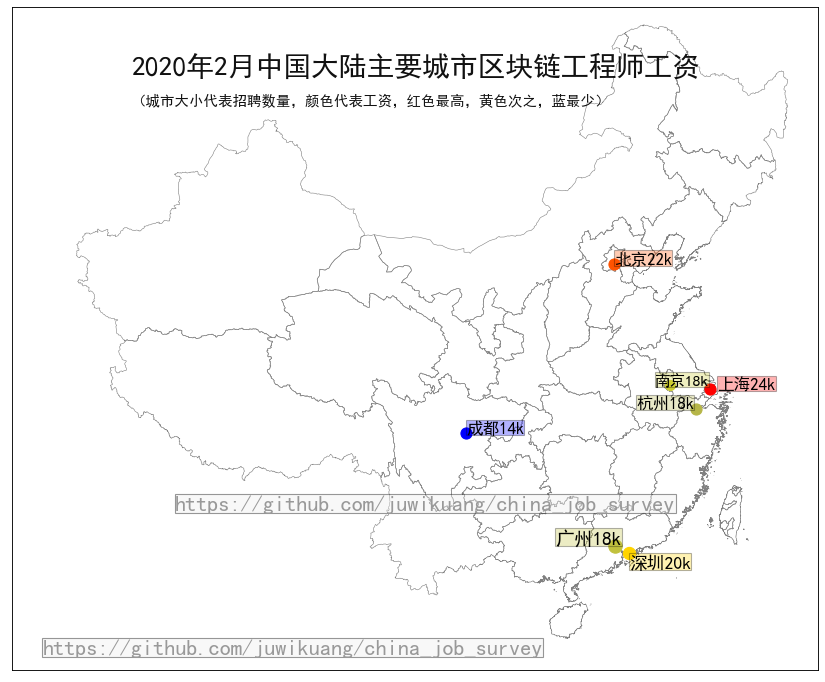

In [15]:
draw_city_map(data_blockchain[data_blockchain['招聘人数']>10],10,f'{year}年{month}月中国大陆主要城市区块链工程师工资')

# 算法工程师

In [16]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'city')
data_city_algorithm.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
1,北京,22586,5250,20833,46750,2816,13.75%
2,上海,22313,6000,20000,45833,3859,18.84%
3,深圳,21314,5250,18500,49850,3555,17.36%
6,杭州,19754,3750,17500,45000,1344,6.56%
15,广州,18430,6000,17000,40000,2091,10.21%
16,南京,16856,4940,16000,35000,1131,5.52%
12,苏州,16213,6871,15000,31492,789,3.85%
17,合肥,15609,6850,13500,40208,222,1.08%
0,西安,15209,4332,12916,50000,613,2.99%
8,武汉,15060,3795,15000,28933,1054,5.15%


In [17]:
describe(data_city_algorithm,'算法工程师')

2020年2月北京招收算法工程师2816人。2019年2月北京算法工程师平均工资22586元，工资中位数20833元，其中95%的人的工资介于5250元到46750元。

2020年2月上海招收算法工程师3859人。2019年2月上海算法工程师平均工资22313元，工资中位数20000元，其中95%的人的工资介于6000元到45833元。

2020年2月深圳招收算法工程师3555人。2019年2月深圳算法工程师平均工资21314元，工资中位数18500元，其中95%的人的工资介于5250元到49850元。

2020年2月杭州招收算法工程师1344人。2019年2月杭州算法工程师平均工资19754元，工资中位数17500元，其中95%的人的工资介于3750元到45000元。

2020年2月广州招收算法工程师2091人。2019年2月广州算法工程师平均工资18430元，工资中位数17000元，其中95%的人的工资介于6000元到40000元。

2020年2月南京招收算法工程师1131人。2019年2月南京算法工程师平均工资16856元，工资中位数16000元，其中95%的人的工资介于4940元到35000元。

2020年2月苏州招收算法工程师789人。2019年2月苏州算法工程师平均工资16213元，工资中位数15000元，其中95%的人的工资介于6871元到31492元。

2020年2月合肥招收算法工程师222人。2019年2月合肥算法工程师平均工资15609元，工资中位数13500元，其中95%的人的工资介于6850元到40208元。

2020年2月西安招收算法工程师613人。2019年2月西安算法工程师平均工资15209元，工资中位数12916元，其中95%的人的工资介于4332元到50000元。

2020年2月武汉招收算法工程师1054人。2019年2月武汉算法工程师平均工资15060元，工资中位数15000元，其中95%的人的工资介于3795元到28933元。

2020年2月大连招收算法工程师95人。2019年2月大连算法工程师平均工资14633元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2020年2月成都招收算法工程师875人。2019年2月成都算法工程师平均工资14532元，工资中位数12500元，其

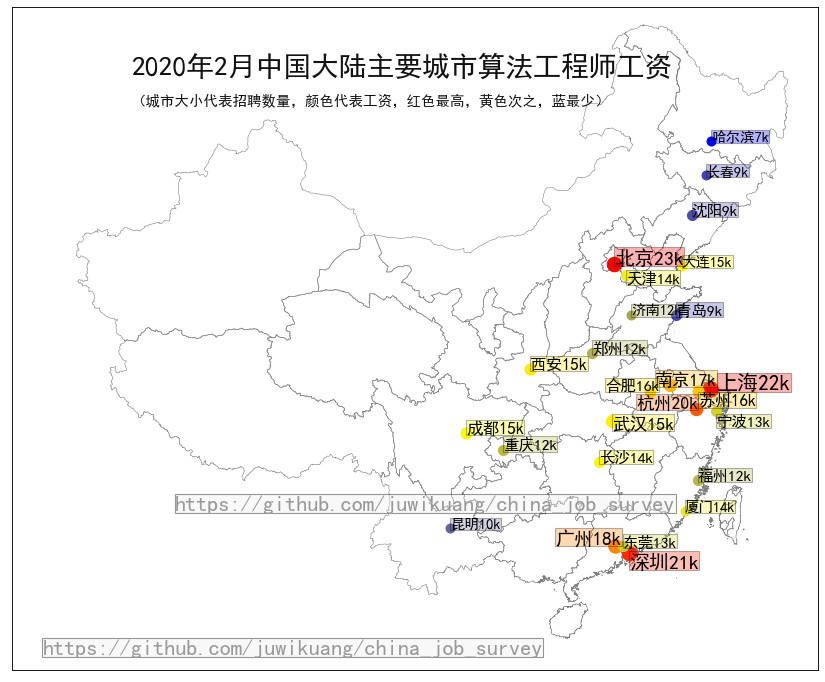

In [18]:
draw_city_map(data_city_algorithm,100,f'{year}年{month}月中国大陆主要城市算法工程师工资')

# 系统架构师

In [19]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'city')
data_city_architect.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
5,北京,31005,10222,30000,55000,1192,15.64%
7,杭州,27461,6925,26500,45000,442,5.80%
9,深圳,26816,9000,25200,50000,1100,14.43%
4,上海,23764,7000,22500,50000,1472,19.31%
3,广州,20945,5250,20000,42264,1174,15.40%
2,南京,20413,5002,20000,37500,327,4.29%
10,成都,19865,7568,19667,44187,219,2.87%
12,长沙,18358,7278,17833,36188,121,1.59%
0,大连,17922,5472,16250,38611,92,1.21%
14,东莞,17302,7000,17167,28511,64,0.84%


In [20]:
describe(data_city_architect,'系统架构师')

2020年2月北京招收系统架构师1192人。2019年2月北京系统架构师平均工资31005元，工资中位数30000元，其中95%的人的工资介于10222元到55000元。

2020年2月杭州招收系统架构师442人。2019年2月杭州系统架构师平均工资27461元，工资中位数26500元，其中95%的人的工资介于6925元到45000元。

2020年2月深圳招收系统架构师1100人。2019年2月深圳系统架构师平均工资26816元，工资中位数25200元，其中95%的人的工资介于9000元到50000元。

2020年2月上海招收系统架构师1472人。2019年2月上海系统架构师平均工资23764元，工资中位数22500元，其中95%的人的工资介于7000元到50000元。

2020年2月广州招收系统架构师1174人。2019年2月广州系统架构师平均工资20945元，工资中位数20000元，其中95%的人的工资介于5250元到42264元。

2020年2月南京招收系统架构师327人。2019年2月南京系统架构师平均工资20413元，工资中位数20000元，其中95%的人的工资介于5002元到37500元。

2020年2月成都招收系统架构师219人。2019年2月成都系统架构师平均工资19865元，工资中位数19667元，其中95%的人的工资介于7568元到44187元。

2020年2月长沙招收系统架构师121人。2019年2月长沙系统架构师平均工资18358元，工资中位数17833元，其中95%的人的工资介于7278元到36188元。

2020年2月大连招收系统架构师92人。2019年2月大连系统架构师平均工资17922元，工资中位数16250元，其中95%的人的工资介于5472元到38611元。

2020年2月东莞招收系统架构师64人。2019年2月东莞系统架构师平均工资17302元，工资中位数17167元，其中95%的人的工资介于7000元到28511元。

2020年2月西安招收系统架构师193人。2019年2月西安系统架构师平均工资17222元，工资中位数17500元，其中95%的人的工资介于7000元到41125元。

2020年2月武汉招收系统架构师378人。2019年2月武汉系统架构师平均工资16405元，工资中位数15000元，其中95

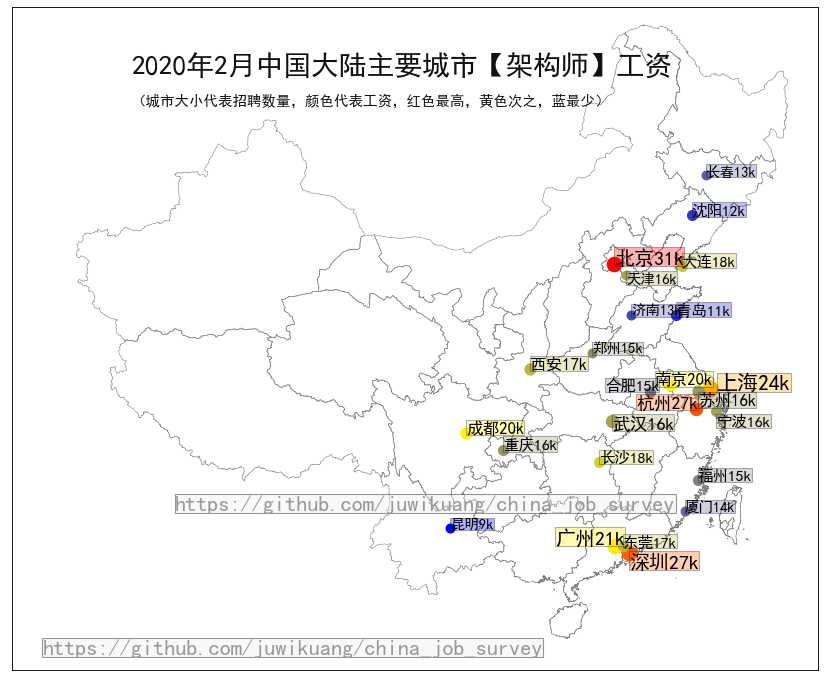

In [21]:
draw_city_map(data_city_architect,40,f'{year}年{month}月中国大陆主要城市【架构师】工资')

# 生物信息工程师

In [22]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'city')
data_bio.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
6,宁波,16000,16000,16000,16000,1,3.12%
5,北京,15000,15000,15000,15000,5,15.62%
2,苏州,12500,12500,12500,12500,1,3.12%
0,广州,12100,7000,13125,15000,10,31.25%
4,杭州,11500,11500,11500,11500,1,3.12%
7,上海,9800,8000,9800,12500,5,15.62%
3,武汉,9000,9000,9000,9000,1,3.12%
8,南京,9000,9000,9000,9000,3,9.38%
1,深圳,7500,7500,7500,7500,5,15.62%


In [23]:
describe(data_bio,'生物信息工程师')

2020年2月宁波招收生物信息工程师1人。2019年2月宁波生物信息工程师平均工资16000元，工资中位数16000元，其中95%的人的工资介于16000元到16000元。

2020年2月北京招收生物信息工程师5人。2019年2月北京生物信息工程师平均工资15000元，工资中位数15000元，其中95%的人的工资介于15000元到15000元。

2020年2月苏州招收生物信息工程师1人。2019年2月苏州生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2020年2月广州招收生物信息工程师10人。2019年2月广州生物信息工程师平均工资12100元，工资中位数13125元，其中95%的人的工资介于7000元到15000元。

2020年2月杭州招收生物信息工程师1人。2019年2月杭州生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2020年2月上海招收生物信息工程师5人。2019年2月上海生物信息工程师平均工资9800元，工资中位数9800元，其中95%的人的工资介于8000元到12500元。

2020年2月武汉招收生物信息工程师1人。2019年2月武汉生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2020年2月南京招收生物信息工程师3人。2019年2月南京生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2020年2月深圳招收生物信息工程师5人。2019年2月深圳生物信息工程师平均工资7500元，工资中位数7500元，其中95%的人的工资介于7500元到7500元。



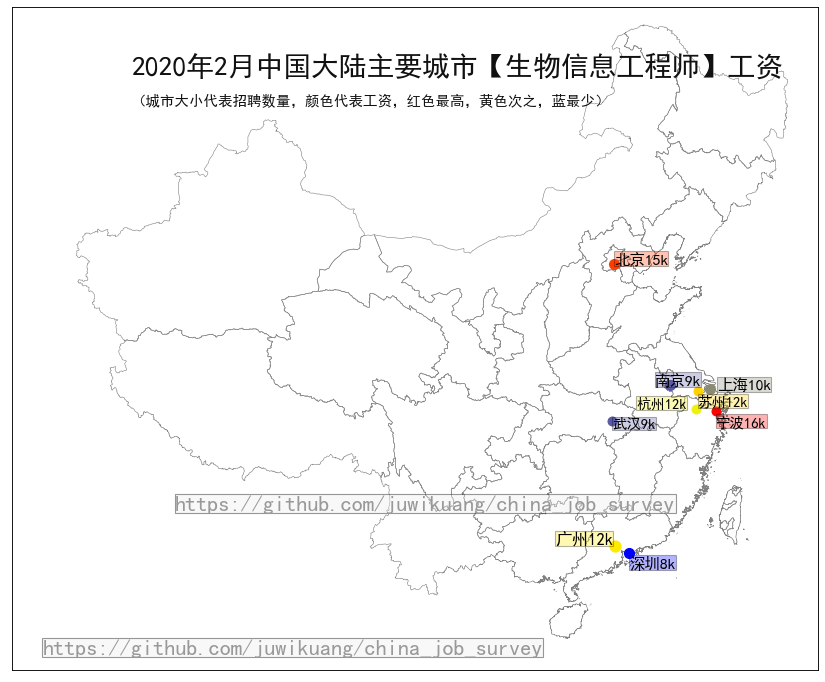

In [24]:
draw_city_map(data_bio,2,f'{year}年{month}月中国大陆主要城市【生物信息工程师】工资')

# 爬虫工程师

In [25]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'city')
data_spider=data_spider[data_spider['招聘人数']>10]
data_spider.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
5,北京,16420,11500,17500,34375,25,8.59%
3,上海,13787,4275,12650,33687,54,18.56%
0,武汉,13364,10500,12500,20000,11,3.78%
2,深圳,11533,5250,11000,21250,45,15.46%
1,广州,9947,1750,11643,17050,38,13.06%
4,长沙,9278,7000,9312,11500,18,6.19%
6,成都,7484,6250,6250,15850,32,11.00%
14,合肥,6944,6000,7000,7000,18,6.19%
13,西安,6500,5250,6250,9000,14,4.81%


In [26]:
describe(data_spider, '爬虫工程师')

2020年2月北京招收爬虫工程师25人。2019年2月北京爬虫工程师平均工资16420元，工资中位数17500元，其中95%的人的工资介于11500元到34375元。

2020年2月上海招收爬虫工程师54人。2019年2月上海爬虫工程师平均工资13787元，工资中位数12650元，其中95%的人的工资介于4275元到33687元。

2020年2月武汉招收爬虫工程师11人。2019年2月武汉爬虫工程师平均工资13364元，工资中位数12500元，其中95%的人的工资介于10500元到20000元。

2020年2月深圳招收爬虫工程师45人。2019年2月深圳爬虫工程师平均工资11533元，工资中位数11000元，其中95%的人的工资介于5250元到21250元。

2020年2月广州招收爬虫工程师38人。2019年2月广州爬虫工程师平均工资9947元，工资中位数11643元，其中95%的人的工资介于1750元到17050元。

2020年2月长沙招收爬虫工程师18人。2019年2月长沙爬虫工程师平均工资9278元，工资中位数9312元，其中95%的人的工资介于7000元到11500元。

2020年2月成都招收爬虫工程师32人。2019年2月成都爬虫工程师平均工资7484元，工资中位数6250元，其中95%的人的工资介于6250元到15850元。

2020年2月合肥招收爬虫工程师18人。2019年2月合肥爬虫工程师平均工资6944元，工资中位数7000元，其中95%的人的工资介于6000元到7000元。

2020年2月西安招收爬虫工程师14人。2019年2月西安爬虫工程师平均工资6500元，工资中位数6250元，其中95%的人的工资介于5250元到9000元。



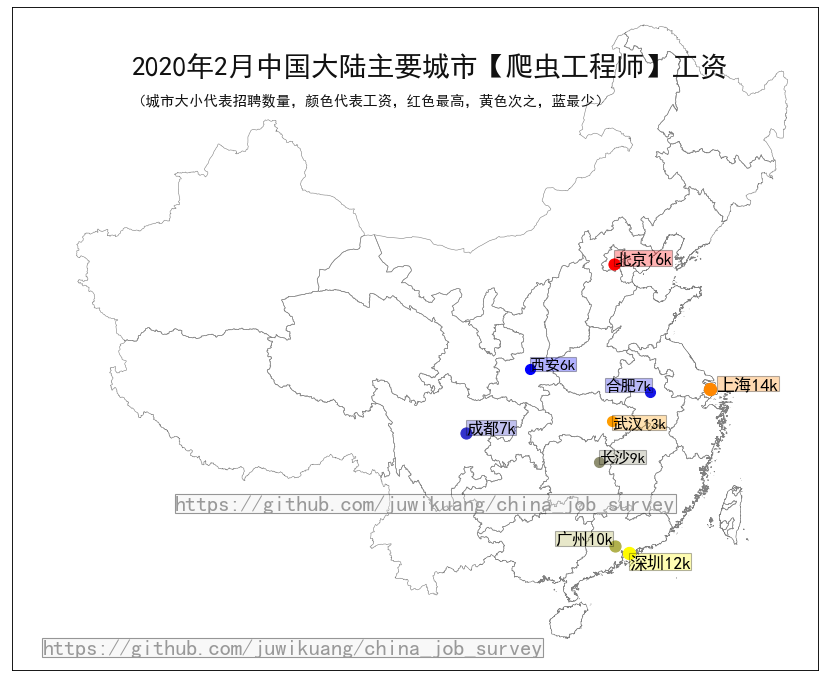

In [27]:
draw_city_map(data_spider,5,f'{year}年{month}月中国大陆主要城市【爬虫工程师】工资')

# Java程序员

In [28]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'city')
data_java.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
2,北京,17020,3750,15000,40000,9488,9.91%
0,深圳,16931,7000,15000,37500,12209,12.75%
3,上海,16545,5250,15000,35000,15770,16.47%
11,杭州,15580,3750,13815,40000,5019,5.24%
9,广州,14120,3750,12500,30000,11201,11.70%
7,南京,12984,4250,12500,27041,6122,6.39%
17,东莞,12470,5250,12500,22500,687,0.72%
4,大连,12065,2500,10000,30000,4664,4.87%
1,成都,11953,3750,10500,27500,3863,4.03%
10,苏州,11734,3633,11000,25000,2226,2.32%


In [29]:
describe(data_java, 'Java程序员')

2020年2月北京招收Java程序员9488人。2019年2月北京Java程序员平均工资17020元，工资中位数15000元，其中95%的人的工资介于3750元到40000元。

2020年2月深圳招收Java程序员12209人。2019年2月深圳Java程序员平均工资16931元，工资中位数15000元，其中95%的人的工资介于7000元到37500元。

2020年2月上海招收Java程序员15770人。2019年2月上海Java程序员平均工资16545元，工资中位数15000元，其中95%的人的工资介于5250元到35000元。

2020年2月杭州招收Java程序员5019人。2019年2月杭州Java程序员平均工资15580元，工资中位数13815元，其中95%的人的工资介于3750元到40000元。

2020年2月广州招收Java程序员11201人。2019年2月广州Java程序员平均工资14120元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2020年2月南京招收Java程序员6122人。2019年2月南京Java程序员平均工资12984元，工资中位数12500元，其中95%的人的工资介于4250元到27041元。

2020年2月东莞招收Java程序员687人。2019年2月东莞Java程序员平均工资12470元，工资中位数12500元，其中95%的人的工资介于5250元到22500元。

2020年2月大连招收Java程序员4664人。2019年2月大连Java程序员平均工资12065元，工资中位数10000元，其中95%的人的工资介于2500元到30000元。

2020年2月成都招收Java程序员3863人。2019年2月成都Java程序员平均工资11953元，工资中位数10500元，其中95%的人的工资介于3750元到27500元。

2020年2月苏州招收Java程序员2226人。2019年2月苏州Java程序员平均工资11734元，工资中位数11000元，其中95%的人的工资介于3633元到25000元。

2020年2月武汉招收Java程序员5041人。2019年2月武汉Java程序员平均工资11518元，工资中位数10500元，其中95%的人的工资介于4750元到25816元。

2020年2月西

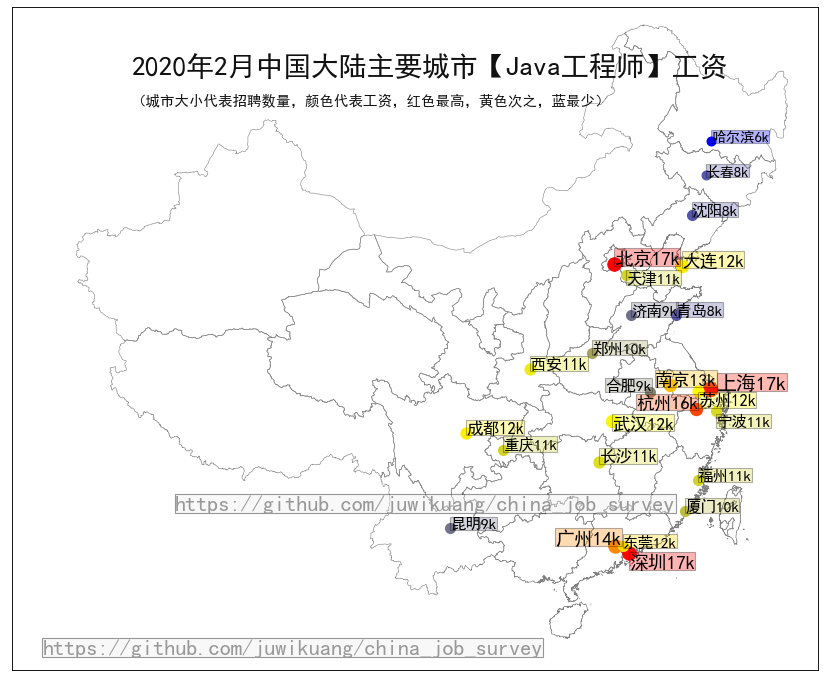

In [30]:
draw_city_map(data_java, 500, f'{year}年{month}月中国大陆主要城市【Java工程师】工资')

# Python程序员

In [31]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'city')

data_python.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
0,北京,23845,5022,22500,48620,3638,14.61%
4,深圳,20746,7000,17500,46000,3376,13.56%
1,上海,20506,5250,18500,45000,5099,20.48%
3,杭州,20311,3750,17500,45000,1364,5.48%
14,广州,17269,4500,15441,37500,2582,10.37%
6,成都,15425,3750,14000,35000,1329,5.34%
13,西安,14986,3750,13000,39000,688,2.76%
5,南京,14763,3750,14000,30000,1613,6.48%
7,苏州,14494,6500,12500,32038,654,2.63%
22,东莞,14443,1539,15000,31821,178,0.71%


In [32]:
describe(data_python, 'Python程序员')

2020年2月北京招收Python程序员3638人。2019年2月北京Python程序员平均工资23845元，工资中位数22500元，其中95%的人的工资介于5022元到48620元。

2020年2月深圳招收Python程序员3376人。2019年2月深圳Python程序员平均工资20746元，工资中位数17500元，其中95%的人的工资介于7000元到46000元。

2020年2月上海招收Python程序员5099人。2019年2月上海Python程序员平均工资20506元，工资中位数18500元，其中95%的人的工资介于5250元到45000元。

2020年2月杭州招收Python程序员1364人。2019年2月杭州Python程序员平均工资20311元，工资中位数17500元，其中95%的人的工资介于3750元到45000元。

2020年2月广州招收Python程序员2582人。2019年2月广州Python程序员平均工资17269元，工资中位数15441元，其中95%的人的工资介于4500元到37500元。

2020年2月成都招收Python程序员1329人。2019年2月成都Python程序员平均工资15425元，工资中位数14000元，其中95%的人的工资介于3750元到35000元。

2020年2月西安招收Python程序员688人。2019年2月西安Python程序员平均工资14986元，工资中位数13000元，其中95%的人的工资介于3750元到39000元。

2020年2月南京招收Python程序员1613人。2019年2月南京Python程序员平均工资14763元，工资中位数14000元，其中95%的人的工资介于3750元到30000元。

2020年2月苏州招收Python程序员654人。2019年2月苏州Python程序员平均工资14494元，工资中位数12500元，其中95%的人的工资介于6500元到32038元。

2020年2月东莞招收Python程序员178人。2019年2月东莞Python程序员平均工资14443元，工资中位数15000元，其中95%的人的工资介于1539元到31821元。

2020年2月武汉招收Python程序员1023人。2019年2月武汉Python程序员平均工资14378元，工资中位数125

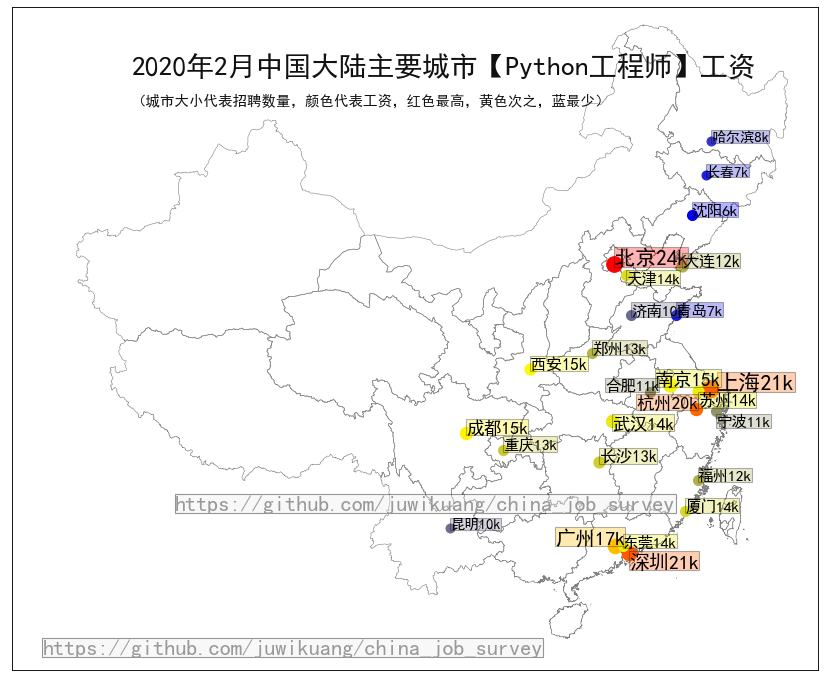

In [33]:
draw_city_map(data_python, 100,  f'{year}年{month}月中国大陆主要城市【Python工程师】工资')

In [34]:
history_data = pd.read_sql(sql='select * from CityStats', con=conn)

In [35]:
del history_data['Id']

In [36]:
history_data.head()

,Month,City,Salary
0,201906,哈尔滨,5983
1,201906,杭州,14707
2,201906,厦门,9789
3,201906,苏州,11197
4,201906,长沙,10852


In [37]:
data_hangzhou = history_data[history_data.City=='杭州']

In [38]:
del data_hangzhou['City']

In [39]:
import matplotlib.pyplot as plt

In [40]:
data_hangzhou.Salary.values

array([14707, 14980, 15106, 14980, 14758, 14921, 15050, 15375, 15566],
      dtype=int64)

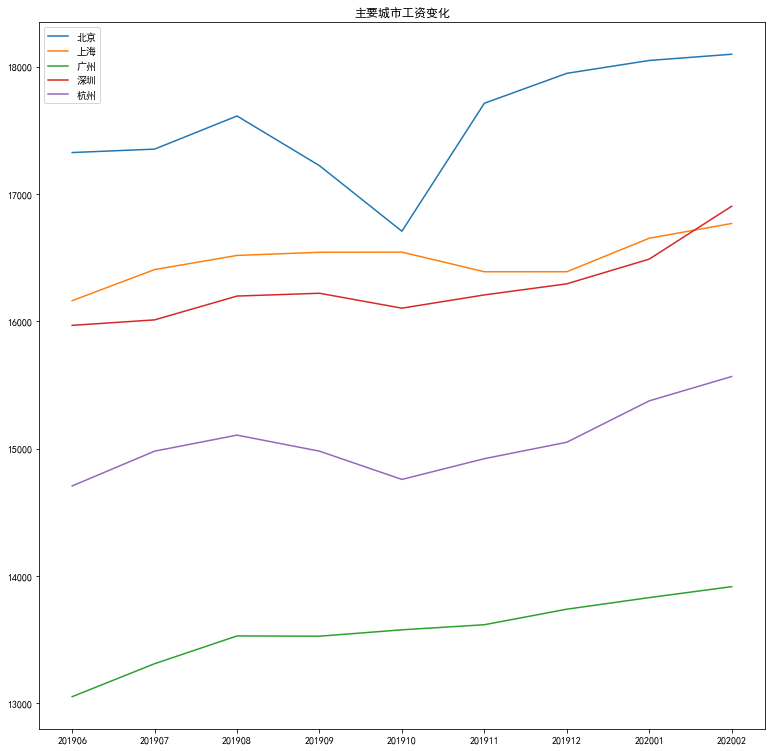

In [41]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
cities = set(history_data.City)
cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    plt.plot("Month","Salary",data=history_data[history_data.City==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend()
plt.show()